<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Вывод-первых-строк-и-изучение-полученной-информации" data-toc-modified-id="Вывод-первых-строк-и-изучение-полученной-информации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод первых строк и изучение полученной информации</a></span></li><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Форматирование-текста" data-toc-modified-id="Форматирование-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Форматирование текста</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка к обучению</a></span><ul class="toc-item"><li><span><a href="#Метод-LogisticRegression()" data-toc-modified-id="Метод-LogisticRegression()-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Метод LogisticRegression()</a></span></li><li><span><a href="#Метод-DecisionTreeClassifier()" data-toc-modified-id="Метод-DecisionTreeClassifier()-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Метод DecisionTreeClassifier()</a></span></li><li><span><a href="#Метод-RandomForestClassifier()" data-toc-modified-id="Метод-RandomForestClassifier()-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Метод RandomForestClassifier()</a></span></li><li><span><a href="#Метод-SVM()" data-toc-modified-id="Метод-SVM()-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Метод SVM()</a></span></li><li><span><a href="#Метод-GaussianNB()" data-toc-modified-id="Метод-GaussianNB()-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Метод GaussianNB()</a></span></li><li><span><a href="#Метод-K-NN()" data-toc-modified-id="Метод-K-NN()-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Метод K-NN()</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект для «Викишоп» c BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка данных

In [1]:
!pip install imblearn
!pip install torchvision

### Импорт библиотек

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import re
import random
import math
import os
import string
import transformers

from torchvision import transforms
from transformers import BertTokenizer, BertForSequenceClassification, BertModel

from tqdm.notebook import tqdm
from tqdm import notebook

from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV, 
    TimeSeriesSplit, 
    cross_val_score,
    train_test_split)

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

### Вывод первых строк и изучение полученной информации

In [3]:
def my_func(x):
    display('Исходный датафрейм')
    display(x.head(8))
    display('Общая информация о датафрейме')
    display(x.info())
    display('Количество пустых значений в датафрейме')
    display(x.isna().sum())
    display('Количество явных дубликатов в датафрейме')
    display(x.duplicated().sum())
    display('Описательная статистика')
    display(x.describe())
    display('Зависимость признаков')
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]
    corr = round(x.corr(), 2)
    display(corr.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify()))

In [4]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('C:/Users/daria/Датасеты для проектов/13 Машинное обучение для текстов - проект для Викишоп/toxic_comments.csv')
my_func(data)

'Исходный датафрейм'

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0


'Общая информация о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


None

'Количество пустых значений в датафрейме'

Unnamed: 0    0
text          0
toxic         0
dtype: int64

'Количество явных дубликатов в датафрейме'

0

'Описательная статистика'

,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


'Зависимость признаков'

,Unnamed: 0,toxic
Unnamed: 0,1.00,-0.00
toxic,-0.00,1.00


### Исследование баланса классов

In [5]:
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

Видим большой дисбаланс, отобразим его графически:

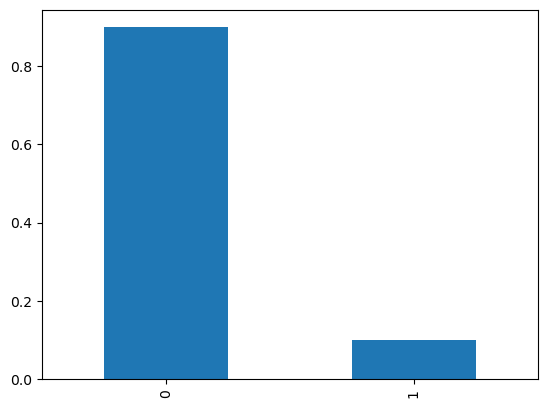

In [6]:
_ = data['toxic'].value_counts(normalize=True).plot(kind='bar')

Дисбаланс примерно 10% на 90% - достаточно большой.

### Форматирование текста

Отформатируем текст, избавившись от знаков препинания, гиперссылок, "\n", а также изменяем регистр. Так как мы используем модель BERT, то мы не удаляем стоп-слова, чтобы модель не потеряла контекст.

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
data['text'] = data['text'].apply(str).apply(lambda x: clean_text(x))
data.head(10)

,Unnamed: 0,text,toxic
0,0,explanationwhy the edits made under my usernam...,0
1,1,daww he matches this background colour im seem...,0
2,2,hey man im really not trying to edit war its j...,0
3,3,morei cant make any real suggestions on improv...,0
4,4,you sir are my hero any chance you remember wh...,0
5,5,congratulations from me as well use the tools ...,0
6,6,cocksucker before you piss around on my work,1
7,7,your vandalism to the matt shirvington article...,0
8,8,sorry if the word nonsense was offensive to yo...,0
9,9,alignment on this subject and which are contra...,0


Проверим, какие значения хранятся в столбце 'toxic'.

In [10]:
data.toxic.unique()

array([0, 1], dtype=int64)

Уникальных значений всего два - 1 и 0, то, что нам нужно. Далее удалим задвоенный столбец с индексами:

In [11]:
data.drop(columns=['Unnamed: 0'])

,text,toxic
0,explanationwhy the edits made under my usernam...,0
1,daww he matches this background colour im seem...,0
2,hey man im really not trying to edit war its j...,0
3,morei cant make any real suggestions on improv...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
159287,and for the second time of asking when your vi...,0
159288,you should be ashamed of yourself that is a ho...,0
159289,spitzer umm theres no actual article for prost...,0
159290,and it looks like it was actually you who put ...,0


Чтобы не создавать эмбеддинги слишком долго, возьмем из выборки 1000 случайных элементов.

In [12]:
data = data.sample(1000, random_state=12345).reset_index(drop=True)

### Промежуточный вывод

В начале исследования были импортированы все необходимые библиотеки и рассмотрен датафрейм. В исходных данных 159292 строк, отсутствуют пустые значения и дубликаты, но присутствует большой дисбаланс - 10% токсичных комментариев, 90% "стандартных". Было принято решение отформатировать текст перед обучением моделей, а также удалить ненужный столбец, дублирующий столбец с индексами. Также мы ограничили выборку до 1000 случайных элементов для оптимизации дальнейшей работы.

## Обучение

### Подготовка к обучению

Проведем токенизацию текстов, а к получившимся закодированным последовательностям добавим паддинги и маску.
Будем использовать модель bert-base-cased.

In [13]:
tokenizer = BertTokenizer.from_pretrained('unitary/toxic-bert')

tokenized = data['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

In [14]:
pd.DataFrame(padded)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,101,6739,4937,20265,25709,2869,2339,2003,2045,2053,...,0,0,0,0,0,0,0,0,0,0
1,101,5005,2521,2102,2831,102,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,101,2019,25617,3796,2003,6413,2130,2005,1037,3576,...,0,0,0,0,0,0,0,0,0,0
3,101,1045,2123,2102,3305,2339,2057,2031,1037,12117,...,0,0,0,0,0,0,0,0,0,0
4,101,7592,2070,1997,1996,2111,3182,2030,2477,2017,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101,2115,12339,2012,4790,2005,4325,6846,11201,2523,...,0,0,0,0,0,0,0,0,0,0
996,101,2061,2027,2134,2102,2156,2505,2004,2045,3475,...,0,0,0,0,0,0,0,0,0,0
997,101,2128,3270,3726,1037,2298,2035,3205,5530,6270,...,0,0,0,0,0,0,0,0,0,0
998,101,6203,3109,17190,2891,2064,2017,2644,3972,20624,...,28637,2243,2111,1996,2883,2218,2011,1996,5037,102


In [15]:
model = BertModel.from_pretrained('unitary/toxic-bert')

In [16]:
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/10 [00:00<?, ?it/s]

In [17]:
features = np.concatenate(embeddings)

In [18]:
features_final = pd.DataFrame(features)
features_final = features_final.dropna()
features_final

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.635504,-0.703305,0.081495,-0.639429,0.671178,0.350575,0.436597,0.390643,-0.551414,-0.589928,...,-0.764710,-0.359494,0.232706,-0.834332,0.017505,0.554773,-0.265268,-0.694367,0.545499,0.739077
1,-0.291251,0.099661,0.491632,-0.371130,0.122507,0.680457,0.789726,1.113528,-0.331364,0.143391,...,-0.991727,0.583062,-0.229646,-0.457128,-0.653195,-0.198899,0.070784,-0.122628,0.449506,0.422324
2,-0.563838,-0.829681,0.648079,-0.617209,0.783029,0.371205,0.237803,0.137432,-0.279928,-0.584619,...,-0.620984,-1.243323,0.658957,-0.371770,0.017504,0.646410,-0.439046,-0.865320,0.476207,0.335031
3,-0.487808,-0.753664,0.690617,-0.283727,0.816633,0.161522,0.009903,0.017450,-0.202628,-0.616545,...,-0.684803,-1.060231,0.345952,-0.571224,0.082368,0.976305,-0.486156,-0.852764,0.616862,0.287910
4,-0.287314,-0.668821,0.677353,-0.548212,0.889158,0.132818,-0.000072,0.135495,-0.156961,-0.625257,...,-0.608045,-1.202438,0.449768,-0.441045,0.085390,0.756441,-0.504315,-0.916202,0.582383,0.304060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.340316,-0.637940,0.587229,-0.439812,0.814885,0.042588,-0.083314,0.108277,-0.195416,-0.693661,...,-0.459407,-1.131060,0.466816,-0.517702,0.063296,0.866305,-0.596671,-0.777635,0.551840,0.210567
996,-0.462576,-0.655671,0.508893,-0.606373,0.853625,0.214561,0.096027,0.033462,-0.166991,-0.485975,...,-0.660371,-1.122361,0.485445,-0.507140,0.077131,0.824327,-0.476473,-0.874483,0.657639,0.288426
997,-0.603346,-0.744143,0.651679,-0.663084,0.732991,0.565328,0.417892,0.306241,-0.231201,-0.589836,...,-0.899134,-0.683224,0.261490,-0.642398,-0.201704,0.359470,-0.566508,-0.658897,0.803803,0.635129
998,-0.714947,-0.473126,0.036995,-0.865021,0.770470,0.532497,0.603665,0.396184,-0.952556,-0.979444,...,-0.531408,-0.415839,0.230903,-0.725685,0.133429,0.539215,-0.626219,-0.688707,0.269359,0.665991


Для обучения модели разделим данные следующим образом:

In [19]:
data_new = pd.DataFrame(features_final)
data_new['y'] = data['toxic']

features = data_new.drop('y',axis=1)
target = data['toxic']

features_train, features_test, target_train, target_test = train_test_split(
                                                                features,
                                                                target,
                                                                test_size=0.2,
                                                                random_state=12345)
display(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(800, 768)

(200, 768)

(800,)

(200,)

И создадим функцию для удобного вывода результата обученных разными методами моделей:

In [21]:
def result_func(model_type,
                parameters,
                features_train_new):
    
    pl = Pipeline([('model', model_type)])
    
    gs_pl = GridSearchCV(
            estimator = pl, 
            param_grid = parameters, 
            scoring = 'f1',
            cv = 5,
            n_jobs = -1,
            verbose = 3)
        
    gs_pl.fit(features_train_new, target_train)
    best_model = gs_pl.best_estimator_

    gs_pl_best_score = gs_pl.best_score_
    gs_pl_best_params = gs_pl.best_params_
    best_index = gs_pl.best_index_
    gs_pl_fit_time = round(gs_pl.cv_results_['mean_fit_time'][best_index], 2)
    gs_pl_score_time = round(gs_pl.cv_results_['mean_score_time'][best_index], 2)

    print('Лучшие параметры для метода', model_type, '- {}'.format(gs_pl_best_params))
    print('Значение F1-меры =', round(gs_pl_best_score, 2), '\n')
    print('Время обучения модели', gs_pl_fit_time, 'секунд', '\n')
    print('Время предсказания модели', gs_pl_score_time, 'секунд', '\n')
    
    return best_model, gs_pl_best_score, gs_pl_fit_time, gs_pl_score_time

Приступим к обучению разными методами.

#### Метод LogisticRegression()

In [22]:
features_train_lr = features_train.copy()
features_test_lr = features_test.copy()

In [23]:
%%time

model_lr, f1_score_lr, lr_fit_time, lr_score_time = result_func(
    LogisticRegression(random_state=12345), 
    {'model__penalty': ['l1', 'l2'],
     'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
     'model__C': np.linspace(5, 15, 1),
     'model__class_weight': [None, 'Balanced'],
     'model__max_iter': range(200, 1000, 50)},
    features_train_lr)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Лучшие параметры для метода LogisticRegression(random_state=12345) - {'model__C': 5.0, 'model__class_weight': None, 'model__max_iter': 500, 'model__penalty': 'l1', 'model__solver': 'saga'}
Значение F1-меры = 0.91 

Время обучения модели 29.19 секунд 

Время предсказания модели 0.05 секунд 

Wall time: 25min 36s


#### Метод DecisionTreeClassifier()

In [24]:
features_train_dt = features_train.copy()
features_test_dt = features_test.copy()

In [25]:
%%time

model_dt, f1_score_dt, dt_fit_time, dt_score_time = result_func(
    DecisionTreeClassifier(random_state=12345), 
    {'model__criterion': ['gini', 'entropy', 'log_loss'],
     'model__splitter': ['best', 'random'],
     'model__max_depth': [None] + [i for i in range(2, 7)],
     'model__min_samples_leaf': [6, 7, 8, 9, 10]},
    features_train_dt)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Лучшие параметры для метода DecisionTreeClassifier(random_state=12345) - {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 7, 'model__splitter': 'random'}
Значение F1-меры = 0.89 

Время обучения модели 0.13 секунд 

Время предсказания модели 0.06 секунд 

Wall time: 1min 5s


#### Метод RandomForestClassifier()

In [26]:
features_train_rf = features_train.copy()
features_test_rf = features_test.copy()

In [27]:
%%time

model_rf = RandomForestClassifier(random_state=12345)

pipline_rf = Pipeline([('randomforestclassifier', model_rf)])

param_grid_rf = {
    'randomforestclassifier__n_estimators': range(50, 151, 50),
    'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'randomforestclassifier__max_depth': range(2, 15),
    'randomforestclassifier__min_samples_split': (2, 3, 4),
    'randomforestclassifier__min_samples_leaf': (1, 2, 3, 4)
}

gs_rf = RandomizedSearchCV(
    pipline_rf, 
    param_distributions = param_grid_rf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state = 12345
)

gs_rf.fit(features_train_rf, target_train)

gs_rf_best_score = gs_rf.best_score_
gs_rf_best_params = gs_rf.best_params_
best_index = gs_rf.best_index_
gs_rf_fit_time = round(gs_rf.cv_results_['mean_fit_time'][best_index], 2)
gs_rf_score_time = round(gs_rf.cv_results_['mean_score_time'][best_index], 2)

print('Лучшие параметры для метода', model_rf, '- {}'.format(gs_rf_best_params))
print('Значение F1-меры =', round(gs_rf_best_score, 2), '\n')
print('Время обучения модели', gs_rf_fit_time, 'секунд', '\n')
print('Время предсказания модели', gs_rf_score_time, 'секунд', '\n')

Лучшие параметры для метода RandomForestClassifier(random_state=12345) - {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'entropy'}
Значение F1-меры = 0.92 

Время обучения модели 3.91 секунд 

Время предсказания модели 0.12 секунд 

Wall time: 20.8 s


#### Метод SVM()

In [28]:
features_train_SVC = features_train.copy()
features_test_SVC = features_test.copy()

In [29]:
%%time

model_SVC, f1_score_SVC, SVC_fit_time, SVC_score_time = result_func(
    SVC(random_state=12345), 
    {'model__C': np.arange(5, 15, 1), 
     'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
     'model__decision_function_shape': ['ovo', 'ovr'],
     'model__degree': [2, 3],
     'model__class_weight': [None, 'Balanced']},
    features_train_SVC)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Лучшие параметры для метода SVC(random_state=12345) - {'model__C': 5, 'model__class_weight': None, 'model__decision_function_shape': 'ovo', 'model__degree': 2, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
Значение F1-меры = 0.92 

Время обучения модели 0.16 секунд 

Время предсказания модели 0.06 секунд 

Wall time: 4min 39s


#### Метод GaussianNB()

In [30]:
features_train_Gauss = features_train.copy()
features_test_Gauss = features_test.copy()

In [31]:
%%time

model_Gauss, f1_score_Gauss, Gauss_fit_time, Gauss_score_time = result_func(
    GaussianNB(), 
    {'model__priors': [None],
     'model__var_smoothing': np.logspace(0,-9, num=100)},
    features_train_Gauss)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры для метода GaussianNB() - {'model__priors': None, 'model__var_smoothing': 0.3511191734215131}
Значение F1-меры = 0.92 

Время обучения модели 0.14 секунд 

Время предсказания модели 0.11 секунд 

Wall time: 11.5 s


#### Метод K-NN()

In [32]:
features_train_KNN = features_train.copy()
features_test_KNN = features_test.copy()

In [33]:
%%time

model_KNN, f1_score_KNN, KNN_fit_time, KNN_score_time = result_func(
    KNeighborsClassifier(), 
    {'model__n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20],
     'model__leaf_size': list(range(1, 150, 5)),
     'model__weights': ['uniform', 'distance'],
     'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    features_train_KNN)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Лучшие параметры для метода KNeighborsClassifier() - {'model__algorithm': 'auto', 'model__leaf_size': 1, 'model__n_neighbors': 6, 'model__weights': 'distance'}
Значение F1-меры = 0.91 

Время обучения модели 0.1 секунд 

Время предсказания модели 0.12 секунд 

Wall time: 11min 59s


Проведем анализ всех использованных в исследовании моделей, создадим таблицу, где выведем результаты по качеству предсказания, времени обучения модели, времени предсказания модели.

In [34]:
result = pd.DataFrame(
    data={'F1_score': [f1_score_lr,
                       f1_score_dt,
                       gs_rf_best_score,
                       f1_score_SVC,
                       f1_score_Gauss,
                       f1_score_KNN],
           'Время обучения модели': [lr_fit_time,
                                     dt_fit_time,
                                     gs_rf_fit_time,
                                     SVC_fit_time,
                                     Gauss_fit_time,
                                     KNN_fit_time],
          'Время предсказания модели': [lr_score_time,
                                        dt_score_time,
                                        gs_rf_score_time,
                                        SVC_score_time,
                                        Gauss_score_time,
                                        KNN_score_time]}, 
    index=['LogisticRegression',
           'DecisionTreeClassifier',
           'RandomForestClassifier',
           'SVM',
           'GaussianNB',
           'K-NN'] 
)
result.sort_values(by='F1_score', ascending=False)

,F1_score,Время обучения модели,Время предсказания модели
SVM,0.919278,0.16,0.06
RandomForestClassifier,0.918929,3.91,0.12
GaussianNB,0.918218,0.14,0.11
K-NN,0.913277,0.10,0.12
LogisticRegression,0.912851,29.19,0.05
DecisionTreeClassifier,0.891515,0.13,0.06


По результатам обучения лучшей моделью является модель, обученная методом SVM():
- F1-мера: 0.919
- Время обучения модели: 0.16 секунд
- Время предсказания модели: 0.06 секунд

### Тестирование модели

Теперь приступим к поиску значения метрики на тестовой выборке с помощью модели с лучшим показателем.

In [35]:
predicted_test = model_SVC.predict(features_test_SVC)
f1_test = f1_score(target_test, predicted_test)
print('Значение F1-меры на тестовой выборке: {}'.format(f1_test))

Значение F1-меры на тестовой выборке: 0.9565217391304348


Значение F1-меры на тестовой выборке составило 0.95, что удовлетворяет условию задачи. Оценки F1 могут варьироваться от 0 до 1, где 1 представляет модель, которая идеально классифицирует каждое наблюдение в правильный класс, соответственно, в данном случае мы получили хороший результат F1.

### Проверка модели на адекватность

Проверим модель на адекватность, сравнив итоговое значение f1-меры у dummy-модели с нашим лучшим результатом:

In [36]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
predicted_test_dummy = dummy_model.predict(features_test)
f1_test_dummy = f1_score(predicted_test_dummy, target_test)
print('Значение F1-меры на dummy модели: {}'.format(f1_test_dummy))

Значение F1-меры на dummy модели: 0.19819819819819817


DummyRegressor "предсказывает" наиболее часто встречающийся класс. Показатель итогового значения F1-меры на нашей лучшей модели лучше, чем у DummyClassifier, значит, проверка модели на адекватность пройдена.

## Общий вывод

В нашем датафрейме данные, находящиеся в столбце "toxic", представляют собой бинарную классификацию, которая предполагает два возможных класса меток - описание "токсичное" (=1) или нет (=0). В качестве алгоритмов, которые необходимо использовать в данном случае, были выбраны следующие модели:
- логистическая регрессия;
- дерево решений;
- случайный лес;
- метод опорных векторов;
- наивный байесовский классификатор;
- метод K-ближайших соседей.

Перед обучением был подготовлен датасет в соответствии с механизмом BERT:
1. Выполнили токенизацию каждого текста, ограничили датафрейм до 1000 строк (для того, чтобы компьютер потянул*).
2. Преобразовали текст в номера токенов методом `encode()`, выровняли длины исходных текстов, дополнив векторы нулями там, где необходимо, применив метод **padding**.
3. Уточнили, что нули не несут значимой информации, отбросив токены и создав маску для действительно важных токенов, указав нулевые и не нулевые значения.
4. Преобразовали тексты в эмбеддинги батчами, указав их в размере 100.
5. Собрали все эмбеддинги в матрицу признаков вызовом функции `concatenate()`.
6. Разделили датафрейм на две выборки в размере 20% на 80%.
7. Создали функцию для удобного вывода результата обученных разными методами моделей.
8. Обучили модели.

В результате обучения лучшей моделью стала модель, обученная методом SVM(), с значением f1-меры на тестовой выборке: 0.95.